In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy.linalg import svd
import mne


def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-105, elev=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_zlim(0, 5)
    return ax

### 투영이란 무엇인가?
- 투영이란 한 점을 다른점으로 바꾸어주는 작업으로, 변환이 이루어진 곳에 다시 투영을 하면 효과가 없습니다. 예를들어 3차원 공간의 어느한 점이 있고 그 위로 해가 비친다면 바닥 면에 그림자가 생기는 것과 같습니다.

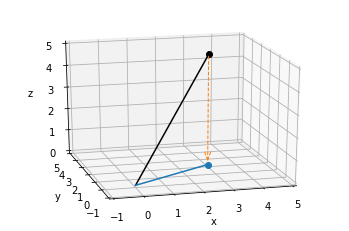

In [2]:
ax = setup_3d_axes()

# plot the vector (3, 2, 5)
origin = np.zeros((3, 1))
point = np.array([[3, 2, 5]]).T
vector = np.hstack([origin, point])
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')

# project the vector onto the x,y plane and plot it
xy_projection_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
projected_point = xy_projection_matrix @ point
projected_vector = xy_projection_matrix @ vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1, color='C1',
            linewidth=1, linestyle='dashed')

In [3]:
trigger_effect = np.array([[3, -1, 1]]).T

In [4]:
# compute the plane orthogonal to trigger_effect
x, y = np.meshgrid(np.linspace(-1, 5, 61), np.linspace(-1, 5, 61))
A, B, C = trigger_effect
z = (-A * x - B * y) / C
# cut off the plane below z=0 (just to make the plot nicer)
mask = np.where(z >= 0)
x = x[mask]
y = y[mask]
z = z[mask]

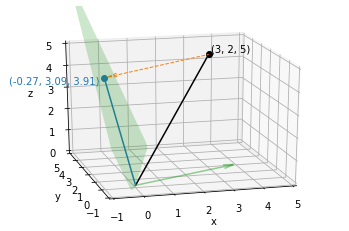

In [5]:
# compute the projection matrix
U, S, V = svd(trigger_effect, full_matrices=False)
trigger_projection_matrix = np.eye(3) - U @ U.T

# project the vector onto the orthogonal plane
projected_point = trigger_projection_matrix @ point
projected_vector = trigger_projection_matrix @ vector

# plot the trigger effect and its orthogonal plane
ax = setup_3d_axes()
ax.plot_trisurf(x, y, z, color='C2', shade=False, alpha=0.25)
ax.quiver3D(*np.concatenate([origin, trigger_effect]).flatten(),
            arrow_length_ratio=0.1, color='C2', alpha=0.5)

# plot the original vector
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')
offset = np.full((3, 1), 0.1)
ax.text(*(point + offset).flat, '({}, {}, {})'.format(*point.flat), color='k')

# plot the projected vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')
offset = np.full((3, 1), -0.2)
ax.text(*(projected_point + offset).flat,
        '({}, {}, {})'.format(*np.round(projected_point.flat, 2)),
        color='C0', horizontalalignment='right')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1,
            color='C1', linewidth=1, linestyle='dashed')

In [6]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()

Opening raw data file C:\Users\rkm14\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 36038 (60.0 sec), ~107.0 MB, data loaded>

In [7]:
print(raw.info['projs'])

[<Projection  |  PCA-v1, active : False, n_channels : 102>, <Projection  |  PCA-v2, active : False, n_channels : 102>, <Projection  |  PCA-v3, active : False, n_channels : 102>]


In [8]:
first_projector = raw.info['projs'][0]
print(first_projector)
print(first_projector.keys())

<Projection  |  PCA-v1, active : False, n_channels : 102>
dict_keys(['kind', 'active', 'desc', 'data', 'explained_var'])


In [9]:
print(raw.proj)
print(first_projector['active'])

False
False


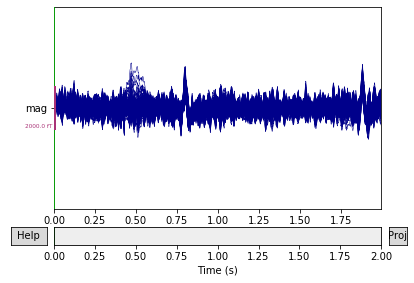

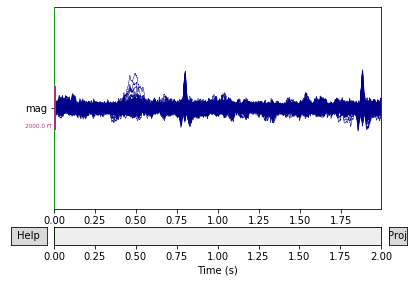

In [10]:
mags = raw.copy().crop(tmax=2).pick_types(meg='mag')
for proj in (False, True):
    fig = mags.plot(butterfly=True, proj=proj)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('proj={}'.format(proj), size='xx-large', weight='bold')

In [11]:
ecg_proj_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                             'sample_audvis_ecg-proj.fif')
ecg_projs = mne.read_proj(ecg_proj_file)
print(ecg_projs)

    Read a total of 6 projection items:
        ECG-planar-999--0.200-0.400-PCA-01 (1 x 203)  idle
        ECG-planar-999--0.200-0.400-PCA-02 (1 x 203)  idle
        ECG-axial-999--0.200-0.400-PCA-01 (1 x 102)  idle
        ECG-axial-999--0.200-0.400-PCA-02 (1 x 102)  idle
        ECG-eeg-999--0.200-0.400-PCA-01 (1 x 59)  idle
        ECG-eeg-999--0.200-0.400-PCA-02 (1 x 59)  idle
[<Projection  |  ECG-planar-999--0.200-0.400-PCA-01, active : False, n_channels : 203>, <Projection  |  ECG-planar-999--0.200-0.400-PCA-02, active : False, n_channels : 203>, <Projection  |  ECG-axial-999--0.200-0.400-PCA-01, active : False, n_channels : 102>, <Projection  |  ECG-axial-999--0.200-0.400-PCA-02, active : False, n_channels : 102>, <Projection  |  ECG-eeg-999--0.200-0.400-PCA-01, active : False, n_channels : 59>, <Projection  |  ECG-eeg-999--0.200-0.400-PCA-02, active : False, n_channels : 59>]


In [12]:
mne.write_proj('heartbeat-proj.fif', ecg_projs)

In [13]:
raw.add_proj(ecg_projs)

6 projection items deactivated


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 36038 (60.0 sec), ~107.1 MB, data loaded>

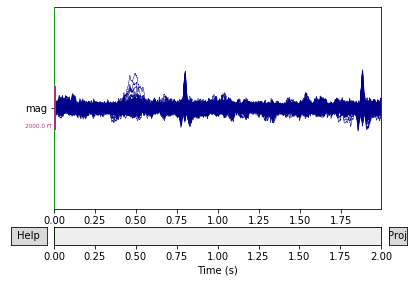

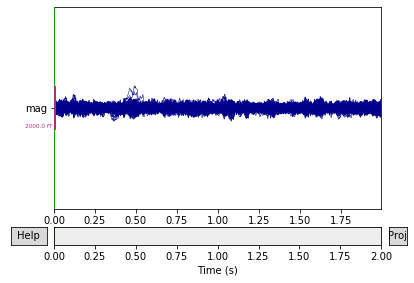

In [14]:
mags_ecg = raw.copy().crop(tmax=2).pick_types(meg='mag')
for data, title in zip([mags, mags_ecg], ['Without', 'With']):
    fig = data.plot(butterfly=True, proj=True)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('{} ECG projector'.format(title), size='xx-large',
                 weight='bold')